In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\sqlttt\\dataset.csv')
dataset.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
dataset_norm=StandardScaler().fit_transform(dataset)
dataset_norm

array([[-0.8767307 , -1.07449777,  2.40886829,  2.0579083 ],
       [-0.8767307 , -1.07449777,  0.28535333,  0.11763692],
       [-0.8767307 , -1.07449777,  1.72023489,  0.43407603],
       [-0.8767307 , -1.07449777,  0.39235214, -0.00727325],
       [-0.8767307 , -1.07449777,  1.4897759 ,  2.557549  ],
       [-0.8767307 , -1.07449777, -0.13441126,  0.14261896],
       [-0.8767307 , -1.07449777,  0.41430062,  0.97535345],
       [-0.8767307 , -1.07449777, -0.2057438 , -0.23211156],
       [-0.8767307 , -1.07449777, -0.05759159,  0.60062293],
       [-0.8767307 , -1.07449777,  0.95478182,  0.76716983],
       [-0.8767307 , -1.07449777, -0.52399669,  0.47571276],
       [-0.8767307 , -1.07449777,  0.98496097,  0.80880656],
       [-0.8767307 , -1.07449777,  0.01648451,  0.60062293],
       [-0.8767307 , -1.07449777,  1.57482624,  1.99128954],
       [-0.8767307 , -1.07449777,  0.54324791, -0.62349678],
       [-0.8767307 , -1.07449777,  0.66396452,  1.01699018],
       [-0.8767307 , -1.

In [38]:
kmeans=KMeans(max_iter=1000)
kmeans.fit(dataset_norm)
        

C:\Users\USER\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000)

In [39]:
kmeans.labels_

array([5, 1, 5, 1, 5, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 5, 1, 1, 1, 5, 1, 1,
       1, 1, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 1, 1, 4, 4, 3, 4, 3, 4, 4, 4, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3,
       3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3,
       4, 3, 0, 0, 7, 0, 0, 0, 7, 7, 0, 7, 7, 7, 0, 0, 7, 0, 7, 0, 7, 0,
       7, 0, 0, 7, 7, 0, 0, 7, 7, 0, 7, 0, 0, 0, 7, 7, 0, 7, 7, 7, 7, 0,
       7, 0, 7, 0, 7, 0, 7, 0, 0, 7, 0, 2, 2, 6, 2, 2, 2, 6, 6, 2, 2, 2,
       6, 2, 2, 2, 2, 6, 2, 6, 2, 6, 2, 2, 2, 6, 2, 2, 6, 2, 2, 2, 2, 2,
       2, 2, 6, 2, 6, 6, 2, 6, 6, 2, 6, 6, 2, 2, 2, 2, 2])

In [40]:
dataset['Brain Weight(grams)']=kmeans.labels_
dataset

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,5
1,1,1,3738,1
2,1,1,4261,5
3,1,1,3777,1
4,1,1,4177,5
...,...,...,...,...
232,2,2,3214,2
233,2,2,3394,2
234,2,2,3233,2
235,2,2,3352,2


In [41]:
dataset.groupby('Brain Weight(grams)').agg(['mean']).reset_index()

,Brain Weight(grams),Gender,Age Range,Head Size(cm^3)
,,mean,mean,mean
0,0,2.0,1.0,3267.111111
1,1,1.0,1.0,3649.575758
2,2,2.0,2.0,3197.941176
3,3,1.0,2.0,3538.400000
4,4,1.0,2.0,4045.093750
5,5,1.0,1.0,4160.833333
6,6,2.0,2.0,3723.375000
7,7,2.0,1.0,3683.576923


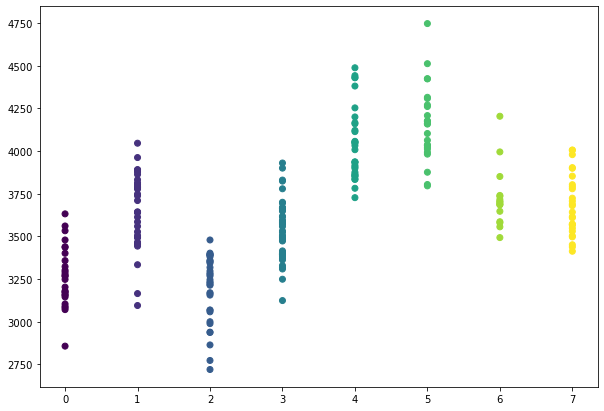

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(dataset['Brain Weight(grams)'],dataset['Head Size(cm^3)'],c=kmeans.labels_)

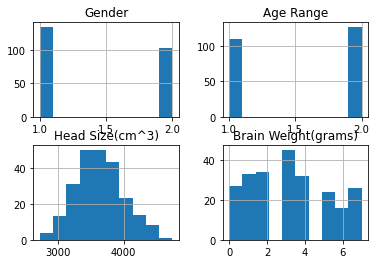

In [52]:
dataset.hist()

plt.show()
